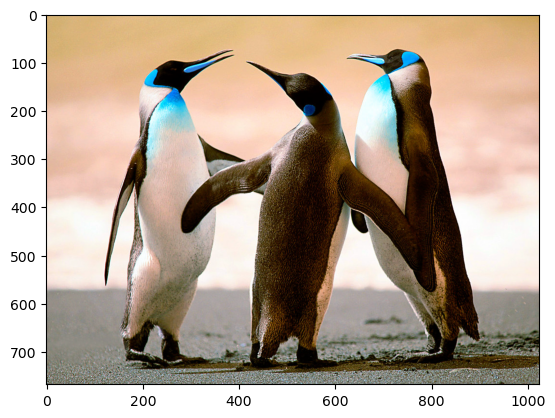

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg")
plt.imshow(image)
plt.show()

## robert filter

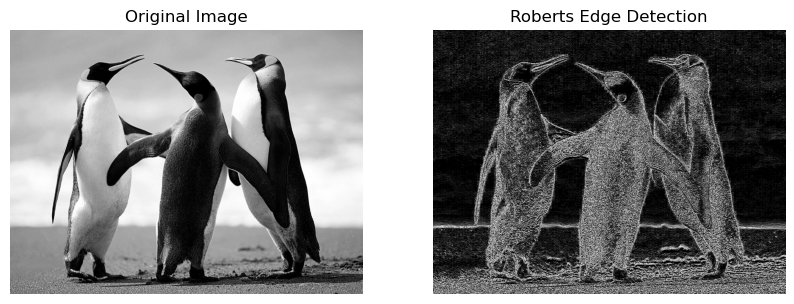

In [2]:
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg", cv2.IMREAD_GRAYSCALE)

roberts_x = np.array([[1, 0], [0, -1]] )
roberts_y = np.array([[0, 1], [-1, 0]] )

edges_x = cv2.filter2D(image, -1, roberts_x)
edges_y = cv2.filter2D(image, -1, roberts_y)

edges = np.sqrt(edges_x**2 + edges_y**2)
edges = np.uint8(edges)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Roberts Edge Detection")
plt.axis("off")

plt.show()


## prewitt filter

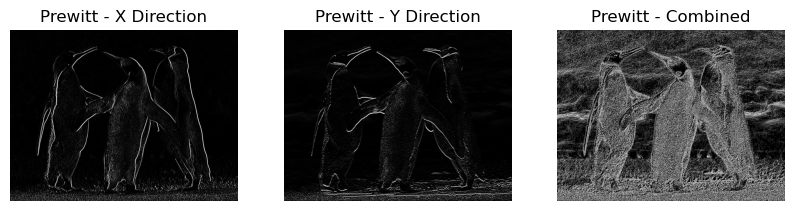

In [3]:
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg", cv2.IMREAD_GRAYSCALE)
prewitt_x = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1], 
                       [0, 0, 0], 
                       [1, 1, 1]])

# Apply convolution using cv2.filter2D()
edges_x = cv2.filter2D(image, -1, prewitt_x)
edges_y = cv2.filter2D(image, -1, prewitt_y)

# Combine both edge directions
edges = np.sqrt(edges_x**2 + edges_y**2)


# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(edges_x, cmap="gray")
plt.title("Prewitt - X Direction")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges_y, cmap="gray")
plt.title("Prewitt - Y Direction")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.title("Prewitt - Combined")
plt.axis("off")

plt.show()


## cannny edge detection using sobel 

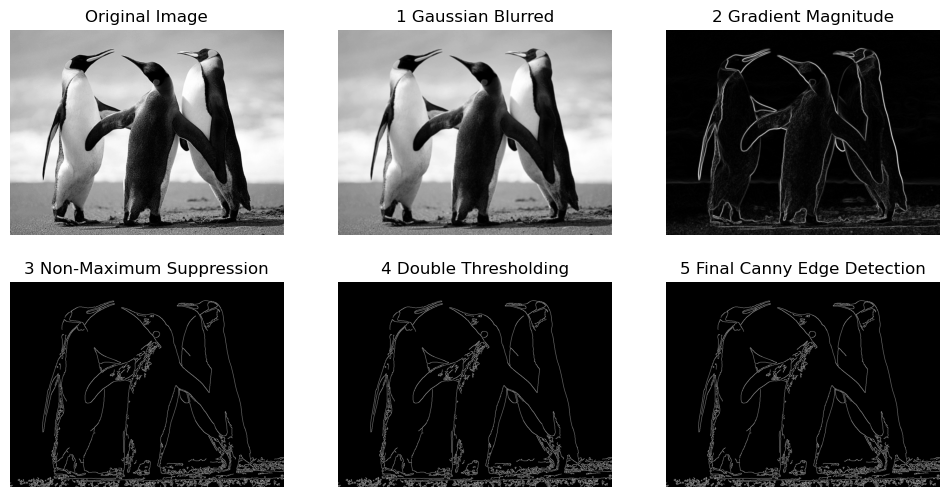

In [4]:
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg", cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)  

sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)  
gradient_magnitude = np.uint8(gradient_magnitude * 255 / np.max(gradient_magnitude))
gradient_direction = np.arctan2(sobel_y, sobel_x)  


edges_nms = cv2.Canny(blurred, 50, 150)  


strong_edges = (edges_nms >= 150).astype(np.uint8) * 255  
weak_edges = ((edges_nms >= 50) & (edges_nms < 150)).astype(np.uint8) * 255  

### Display Results ###
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('1️ Gaussian Blurred')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('2️ Gradient Magnitude')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(edges_nms, cmap='gray')
plt.title('3️ Non-Maximum Suppression')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(strong_edges + weak_edges, cmap='gray')
plt.title('4️ Double Thresholding')
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(edges_nms, cmap='gray')
plt.title('5️ Final Canny Edge Detection')
plt.axis("off")

plt.show()

## log

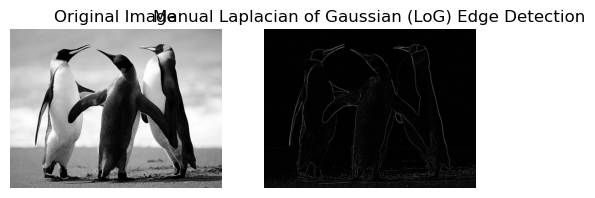

In [5]:
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg", cv2.IMREAD_GRAYSCALE)

### 1️⃣ Step 1: Apply Gaussian Blur ###
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 1.4)  # Smooth image to reduce noise

### 2️⃣ Step 2: Manually Apply Laplacian Filter ###
laplacian_kernel = np.array([[0,  1,  0], 
                             [1, -4,  1], 
                             [0,  1,  0]])  # Standard Laplacian kernel

# Apply the Laplacian kernel using convolution (filter2D)
log_edges = cv2.filter2D(gaussian_blur, -1, laplacian_kernel)

### 3️⃣ Step 3: Normalize and Convert to Absolute Values ###
log_edges = np.abs(log_edges)  # Ensure positive values
log_edges = (log_edges / np.max(log_edges) * 255).astype(np.uint8)  # Normalize to 0-255

### Display Results ###
plt.figure(figsize=(6, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(log_edges, cmap="gray")
plt.title("Manual Laplacian of Gaussian (LoG) Edge Detection")
plt.axis("off")

plt.show()


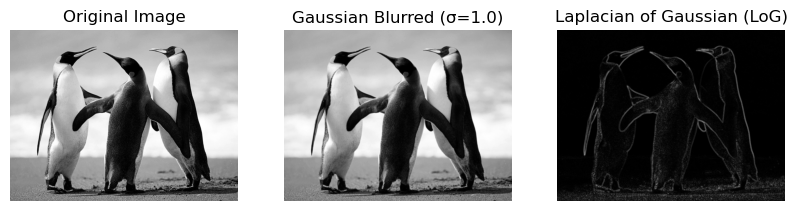

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg", cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float for precise calculations

### 1️⃣ Apply Gaussian Blur ###
sigma = 1.0  # Standard deviation for Gaussian smoothing
smoothed = gaussian_filter(image, sigma=sigma)  # Apply Gaussian filter

### 2️⃣ Compute First-Order Derivatives (Gradient) ###
dx = np.zeros_like(smoothed)
dy = np.zeros_like(smoothed)

dx[:, 1:-1] = (smoothed[:, 2:] - smoothed[:, :-2]) / 2  # ∂I/∂x
dy[1:-1, :] = (smoothed[2:, :] - smoothed[:-2, :]) / 2  # ∂I/∂y

### 3️⃣ Compute Second-Order Derivatives (Laplacian) ###
dxx = np.zeros_like(smoothed)
dyy = np.zeros_like(smoothed)

dxx[:, 1:-1] = (dx[:, 2:] - dx[:, :-2]) / 2  # ∂²I/∂x²
dyy[1:-1, :] = (dy[2:, :] - dy[:-2, :]) / 2  # ∂²I/∂y²

### 4️⃣ Compute Laplacian of Gaussian ###
log = dxx + dyy  # Sum of second derivatives

### 5️⃣ Normalize and Convert to 8-bit Format ###
log = np.abs(log)  # Ensure positive values
log = (log / np.max(log) * 255).astype(np.uint8)  # Normalize to 0-255

### Display Results ###
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(smoothed, cmap='gray')
plt.title(f"Gaussian Blurred (σ={sigma})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(log, cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis("off")

plt.show()


## dog

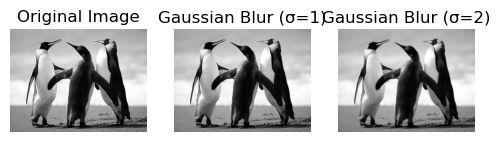

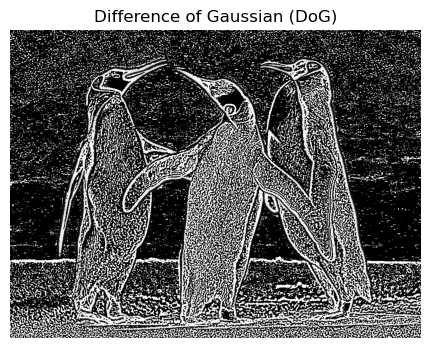

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
image = cv2.imread(r"C:\Users\student\Downloads\penguin.jpg", cv2.IMREAD_GRAYSCALE)
sigma1 = 1  
sigma2 = 2 

blurred1 = gaussian_filter(image, sigma=sigma1)  
blurred2 = gaussian_filter(image, sigma=sigma2)  


dog = blurred1 - blurred2  
plt.figure(figsize=(6, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blurred1, cmap='gray')
plt.title(f"Gaussian Blur (σ={sigma1})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blurred2, cmap='gray')
plt.title(f"Gaussian Blur (σ={sigma2})")
plt.axis("off")

plt.figure(figsize=(6, 4))
plt.imshow(dog, cmap='gray')
plt.title("Difference of Gaussian (DoG)")
plt.axis("off")

plt.show()
